In [27]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **git clone**

In [1]:
!git clone 'https://github.com/Kwang-wan/Project_AI'

Cloning into 'Project_AI'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 182 (delta 81), reused 126 (delta 34), pack-reused 0
Receiving objects: 100% (182/182), 24.51 MiB | 7.86 MiB/s, done.
Resolving deltas: 100% (81/81), done.


> ## git clone 동작 확인

In [2]:
%cd /content/Project_AI/
!ls

/content/Project_AI
'다음 뉴스 댓글 크롤러_댓글 많은 50개_01.ipynb'
 data
 daum_news_comments_20201201_20201231.csv
 daum_news_comments_20210101_20210131.csv
 daum_news_comments_20210201_20210228.csv
 daum_news_comments_20210301_20210331.csv
 hello.txt
'개발 환경.md'
'프로젝트 발표.md'
 README.md


In [3]:
!ls -la /content/Project_AI/data/

total 3964
drwxr-xr-x 4 root root    4096 Apr  6 11:03 .
drwxr-xr-x 4 root root    4096 Apr  6 11:03 ..
drwxr-xr-x 2 root root    4096 Apr  6 11:03 labeled_daum_news
-rw-r--r-- 1 root root   18376 Apr  6 11:03 Merge_Data.ipynb
drwxr-xr-x 3 root root    4096 Apr  6 11:03 raw_data
-rw-r--r-- 1 root root 1670016 Apr  6 11:03 Total_Labeled_daum_news.csv
-rw-r--r-- 1 root root 2350354 Apr  6 11:03 Trash_Comment.csv


# Total_Labeled_daum_news.csv 5:5 split

In [4]:
import pandas as pd

In [5]:
labeled_daum_news = pd.read_csv('/content/Project_AI/data/Total_Labeled_daum_news.csv')

labeled_daum_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9863 entries, 0 to 9862
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기사 작성일  9863 non-null   int64  
 1   댓글 작성일  9863 non-null   int64  
 2   댓글 내용   9863 non-null   object 
 3   좋아요     9863 non-null   int64  
 4   싫어요라벨   0 non-null      float64
 5   싫어요     9863 non-null   float64
 6   라벨      9863 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 539.5+ KB


In [6]:
modified_daum_news = labeled_daum_news[['댓글 내용', '라벨']]

modified_daum_news.head(3)

,댓글 내용,라벨
0,"아들 군대 가고, 서울시장 나오고, TV 조선에서 가족사 보여 주고, 기레기들 기사...",1.0
1,너 민원실에 전화하면 청탁이다ㅋㅋ,2.0
2,가족 범죄단이 부끄러운 줄도 모르고 쯧,1.0


In [8]:
modified_daum_news['라벨'].value_counts()

0.0    6356
1.0    2674
2.0     833
Name: 라벨, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
modified_daum_news_X = modified_daum_news[['댓글 내용']]
modified_daum_news_y = modified_daum_news['라벨']

X_train, X_test, y_train, y_test = train_test_split(modified_daum_news_X, modified_daum_news_y,
                                                    test_size = 0.5,
                                                    random_state = 2045,
                                                    stratify = modified_daum_news_y)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4931, 1), (4932, 1), (4931,), (4932,))

In [16]:
y_train.value_counts(), y_test.value_counts()

(0.0    3178
 1.0    1337
 2.0     416
 Name: 라벨, dtype: int64, 0.0    3178
 1.0    1337
 2.0     417
 Name: 라벨, dtype: int64)

In [22]:
modified_daum_news_train = pd.concat([X_train, y_train], axis = 1)
modified_daum_news_train.columns = ['comment', 'label']

modified_daum_news_train.head()

,comment,label
497,뭔 개소린지 암튼 입만열면 거짓말만 어찌나 하는지,1.0
8021,왜 중국인을 대출을 저렇게 해주나?,0.0
8354,31절에 친일 조선과 일제검사들간의 역적모의 있었는지 조사해봐야 한다,1.0
6850,"억대 연봉 46%는 적냐? 무보직자 1,500명은 적냐?",1.0
1901,직무정지 잘한 일 입니다 윤짜장은 집에 가이소,1.0


In [23]:
modified_daum_news_test = pd.concat([X_test, y_test], axis = 1)
modified_daum_news_test.columns = ['comment', 'label']

modified_daum_news_test.head()

,comment,label
6439,이성윤이가 검찰총장 命 을 거역했구먼. 추미애아줌마 빽 믿고 있다가 이성윤 뭐 되었네.,0.0
4380,첩자가 당신이었나. 저런 인간이 민주당에 있으니 조국. 추미애가 희생만하고 저리 ...,1.0
8847,진짜 허위댓글 심하다 어떻게해서든지 떨어뜨리려고 안간힘을쓰는구나,0.0
6509,철수에게 민주주의란? 킹왕짱인 내 말대로 다 하고 내가 대통령되고 짱먹는 것 -철수 생각,0.0
1951,기레기들의 소설 아니 가짜뉴스는 영원하다. 민주당은 해당 기자를 고소고발로 대응하자,1.0


In [36]:
%cd /content/

modified_daum_news_train.to_csv('train_daum.csv', index = False, encoding = 'utf-8-sig')
modified_daum_news_test.to_csv('test_daum.csv', index = False, encoding = 'utf-8-sig')

!ls -la

/content
total 1388
drwxr-xr-x 1 root root   4096 Apr  6 12:05 .
drwxr-xr-x 1 root root   4096 Apr  6 11:02 ..
drwxr-xr-x 4 root root   4096 Mar 25 13:38 .config
drwx------ 6 root root   4096 Apr  6 12:05 drive
drwxr-xr-x 2 root root   4096 Apr  6 12:03 .ipynb_checkpoints
drwxr-xr-x 4 root root   4096 Apr  6 11:03 Project_AI
drwxr-xr-x 1 root root   4096 Mar 25 13:38 sample_data
-rw-r--r-- 1 root root 681005 Apr  6 12:16 test_daum.csv
-rw-r--r-- 1 root root 707424 Apr  6 12:16 train_daum.csv


# **데이터 Merge**

In [45]:
trash_comment = pd.read_csv('/content/Project_AI/data/Trash_Comment.csv', encoding = 'utf-8')

trash_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23721 entries, 0 to 23720
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    23721 non-null  object
 1   label   23721 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 370.8+ KB


In [46]:
trash_comment.columns = ['comment', 'label']

trash_comment.head(3)

,comment,label
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,1
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,1
2,짱깨 꺼라ㅡ패쓰,1


In [37]:
train_daum = pd.read_csv('/content/train_daum.csv')

train_daum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4931 entries, 0 to 4930
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  4931 non-null   object 
 1   label    4931 non-null   float64
dtypes: float64(1), object(1)
memory usage: 77.2+ KB


In [47]:
train = pd.concat([trash_comment, train_daum], axis = 0)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28652 entries, 0 to 4930
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  28652 non-null  object 
 1   label    28652 non-null  float64
dtypes: float64(1), object(1)
memory usage: 671.5+ KB


In [48]:
test = pd.read_csv('/content/test_daum.csv')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  4932 non-null   object 
 1   label    4932 non-null   float64
dtypes: float64(1), object(1)
memory usage: 77.2+ KB


In [50]:
train = train[train.label != 2]
test = test[test.label != 2]

train.label.value_counts(), test.label.value_counts() 

(0.0    15232
 1.0    13004
 Name: label, dtype: int64, 0.0    3178
 1.0    1337
 Name: label, dtype: int64)

In [55]:
train.to_csv('/content/drive/MyDrive/Colab Notebooks/project/train.csv', encoding = 'utf-8-sig', index = False)
test.to_csv('/content/drive/MyDrive/Colab Notebooks/project/test.csv', encoding = 'utf-8-sig', index = False)

!ls /content/drive/MyDrive/Colab\ Notebooks/project

daum_NLP_kw.ipynb  Labeling.ipynb  Merge_Data.ipynb  test.csv  train.csv


# Data를 가져와서 Data Cleaning까지

In [56]:
import numpy as np
import keras

In [57]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/test.csv')

In [58]:
train['comment'] = train['comment'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', '')
test['comment'] = test['comment'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', '')

In [65]:
train[-10:]

,comment,label
28226,근데 검찰들은 왜 철회하라고 하는거지 진짜잘봇없으면 법눤에서 잘못없다고 판단해서 철...,0.0
28227,공소청 정말 내가 제안한다 수사권 외국에도 경찰에게 수사권 영장청구권주고 기소권은 ...,1.0
28228,재앙이가 한국경재 최소 년은 후퇴시켜놨지 앞으로가 참담하다,1.0
28229,이땅의 교회는 사기업화한지 이미 오래되었다 부자세습은 당연한것이고 주일마다 수금을해...,0.0
28230,권성동강원랜드ㅎㅎ 너나 잘하세요,1.0
28231,나씨 딸 은,0.0
28232,심신이 미약한데 어떻게 그런짓을 저지르나 심신미약이 아니라 심신증강으로 인해 이런...,0.0
28233,못한다,1.0
28234,꼰대들 다 나가라,0.0
28235,별거 없구만,0.0


In [64]:
test[-10:]

,comment,label
4505,또 남탓이냐,0.0
4506,다음생에 당해봐여 정신차리지ㅡㅡ,0.0
4507,고소인이 박시장에게 사랑이 듬뿍담긴 손편지를 보낸것은 어떻게 설명할건가 그것도 성추...,0.0
4508,장모마누라범죄 방탄총장 딱지 떼고 공수처 수사 받아라 장모 최은순내가 손해만 보고 ...,0.0
4509,쟤들 난리 피는 거 보니까ㅋㅋ 제대로 뽑은 듯ㅎㅎ 박범계 화이팅,0.0
4510,윤짜장이 가만히 있지 않을거라는 예상이 적중이거 조사하면 검찰 개욕먹을 일만 있거든,0.0
4511,이스라엘같은나라도 가는데 휴전국가인 우리나라도 여자는 꼭가야한다고 생각한다,0.0
4512,점주님 건강하시고 복많이받으세요,1.0
4513,확실한 증언과 증거사진이 나와야 하는데 ㅋㅋ 이럴때 같이 있었던 사진과 또 비슷한 ...,0.0
4514,표창장은 법정구속 억 횡령은 불구속,0.0


In [66]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '자', '에', '와', '한', '하다']

In [67]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 46.8MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [68]:
%%time

from konlpy.tag import Okt

okt = Okt()
tokenized_data = []

for sentence in train['comment']:
  temp_X = okt.morphs(sentence,
                      stem = True)
  temp_X = [word for word in temp_X if not word in stopwords]
  tokenized_data.append(temp_X)

CPU times: user 1min 58s, sys: 1.14 s, total: 1min 59s
Wall time: 1min 47s


In [69]:
max(len(i) for i in tokenized_data)

360

In [70]:
sum(map(len, tokenized_data)) / len(tokenized_data)

13.072531520045333

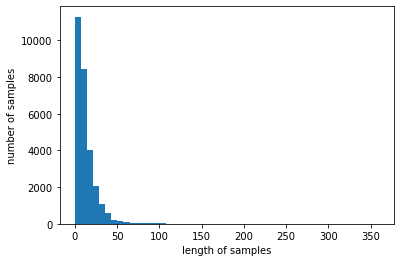

In [72]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [73]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data,
                 size = 100,
                 window = 5,
                 min_count = 5,
                 workers = 4,
                 sg = 1)

In [74]:
model.wv.vectors.shape

(7572, 100)

In [75]:
model.wv.most_similar('짱깨')

[('분탕', 0.948013424873352),
 ('충', 0.944154679775238),
 ('징', 0.9430776834487915),
 ('븅신', 0.9427579641342163),
 ('이노', 0.938112199306488),
 ('염병', 0.9361782073974609),
 ('창년', 0.9349470138549805),
 ('꺼지다', 0.9338674545288086),
 ('아치', 0.9318093061447144),
 ('닭', 0.9311387538909912)]

In [76]:
model.wv.most_similar('판새')

[('일보', 0.9801445007324219),
 ('드루', 0.9797096252441406),
 ('빨대', 0.9794763922691345),
 ('앞장서다', 0.9791297316551208),
 ('장군', 0.9787248373031616),
 ('동원', 0.97846519947052),
 ('윤서', 0.9781845808029175),
 ('정규재', 0.9773243069648743),
 ('독재자', 0.9768017530441284),
 ('나팔수', 0.9765426516532898)]